# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
print("Beginning Data Retrieval")
print("--------------")

citys = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
i = 1
x = 1

for city in cities:
    try:
        print(f"Processing Record {i} of Set {x} | {city}")
        url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
        request = requests.get(url).json()
        citys.append(request['name'])
        lat.append(request['coord']['lat'])
        lng.append(request['coord']['lon'])
        max_temp.append(request['main']['temp_max'])
        humidity.append(request['main']['humidity'])
        cloudiness.append(request['clouds']['all'])
        wind_speed.append(request['wind']['speed'])
        country.append(request['sys']['country'])
        date.append(request['dt'])
        i = i + 1
        if i == 51:
            x = x + 1
            i = i - 50
    except:
        print("City not found. Skipping...")
        i = i + 1
        if i == 51:
            x = x + 1
            i = i - 50
            
print("--------------")            
print("Data Retrieval Complete")
print("--------------")

Beginning Data Retrieval
--------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | contai
Processing Record 3 of Set 1 | kaitangata
Processing Record 4 of Set 1 | esperance
Processing Record 5 of Set 1 | fairbanks
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | hofn
Processing Record 8 of Set 1 | provideniya
Processing Record 9 of Set 1 | pevek
Processing Record 10 of Set 1 | port hawkesbury
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | lompoc
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | saint anthony
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | korla
Processing Record 20 of Set 1 | jodar
Processing Record 21 of Set 1 | naze
Processing Record 22 of Set 1 | teya
Processing Record 23 of Set 1 | atuona
Processing

Processing Record 42 of Set 4 | iquique
Processing Record 43 of Set 4 | oum hadjer
Processing Record 44 of Set 4 | los llanos de aridane
Processing Record 45 of Set 4 | kurumkan
Processing Record 46 of Set 4 | chumikan
Processing Record 47 of Set 4 | temaraia
City not found. Skipping...
Processing Record 48 of Set 4 | bilma
Processing Record 49 of Set 4 | san patricio
Processing Record 50 of Set 4 | aksehir
Processing Record 1 of Set 5 | kahului
Processing Record 2 of Set 5 | udachnyy
Processing Record 3 of Set 5 | wanning
Processing Record 4 of Set 5 | yumen
Processing Record 5 of Set 5 | kaniama
Processing Record 6 of Set 5 | faya
Processing Record 7 of Set 5 | hearst
Processing Record 8 of Set 5 | torbay
Processing Record 9 of Set 5 | srednekolymsk
Processing Record 10 of Set 5 | ambulu
Processing Record 11 of Set 5 | mandalgovi
Processing Record 12 of Set 5 | edd
Processing Record 13 of Set 5 | shelburne
Processing Record 14 of Set 5 | bulawayo
Processing Record 15 of Set 5 | hualm

Processing Record 31 of Set 8 | bathsheba
Processing Record 32 of Set 8 | clearwater
Processing Record 33 of Set 8 | tigil
Processing Record 34 of Set 8 | camabatela
Processing Record 35 of Set 8 | tiarei
Processing Record 36 of Set 8 | menongue
Processing Record 37 of Set 8 | rorvik
Processing Record 38 of Set 8 | nelson bay
Processing Record 39 of Set 8 | moose factory
Processing Record 40 of Set 8 | mossendjo
Processing Record 41 of Set 8 | bouar
Processing Record 42 of Set 8 | mormugao
Processing Record 43 of Set 8 | torbat-e jam
Processing Record 44 of Set 8 | saurimo
Processing Record 45 of Set 8 | bukachacha
Processing Record 46 of Set 8 | oistins
Processing Record 47 of Set 8 | sulangan
Processing Record 48 of Set 8 | mitu
Processing Record 49 of Set 8 | ribnitz-damgarten
Processing Record 50 of Set 8 | camopi
Processing Record 1 of Set 9 | umzimvubu
City not found. Skipping...
Processing Record 2 of Set 9 | louisbourg
City not found. Skipping...
Processing Record 3 of Set 9 | 

Processing Record 16 of Set 12 | sisimiut
Processing Record 17 of Set 12 | tymovskoye
Processing Record 18 of Set 12 | road town
Processing Record 19 of Set 12 | ankazobe
Processing Record 20 of Set 12 | anshun
Processing Record 21 of Set 12 | zhezkazgan
Processing Record 22 of Set 12 | tema
Processing Record 23 of Set 12 | charlottesville
Processing Record 24 of Set 12 | ginir
Processing Record 25 of Set 12 | karpathos
Processing Record 26 of Set 12 | teahupoo
Processing Record 27 of Set 12 | tombouctou
Processing Record 28 of Set 12 | oxilithos
Processing Record 29 of Set 12 | yeysk
Processing Record 30 of Set 12 | novikovo
Processing Record 31 of Set 12 | hovd
Processing Record 32 of Set 12 | havre-saint-pierre
Processing Record 33 of Set 12 | leh
Processing Record 34 of Set 12 | acari
Processing Record 35 of Set 12 | ligayan
Processing Record 36 of Set 12 | angoche
Processing Record 37 of Set 12 | kangaatsiaq
Processing Record 38 of Set 12 | lolua
City not found. Skipping...
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [124]:
city_df = pd.DataFrame({'City': citys,
                       'Lat': lat,
                       'Lng': lng,
                       'Max Temp': max_temp,
                       'Humidity': humidity,
                       'Cloudiness': cloudiness,
                       'Wind Speed': wind_speed,
                       'Country': country,
                       'Date': date})
city_df.to_csv('output_data/city.csv')
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,293.75,38,8,3.59,AU,1636774888
1,Contai,21.7786,87.7536,294.90,93,100,2.89,IN,1636774889
2,Kaitangata,-46.2817,169.8464,282.56,97,100,5.98,NZ,1636774889
3,Esperance,-33.8667,121.9000,291.06,51,100,4.73,AU,1636774889
4,Fairbanks,64.8378,-147.7164,256.82,80,90,0.00,US,1636774802


In [85]:
row = [""]
count = city_df[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Date']].count()
# count.pop(0)
mean = city_df[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Date']].mean()
std = city_df.std()
minimum = city_df[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Date']].min()
quartiles = city_df.quantile([0.25,0.50,0.75])
lowerq = quartiles.loc[0.25]
middleq = quartiles.loc[0.50]
upperq = quartiles.loc[0.75]
maximum = city_df[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Date']].max()
summary_df = pd.DataFrame(np.array([count, mean, std, minimum, lowerq, middleq, upperq, maximum]),
                         columns = ['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Date'])
summary_df.rename(index = {0: "count",
                          1: "mean",
                          2: "std",
                          3: "min",
                          4: "25%",
                          5: "50%",
                          6: "75%",
                          7: "max",})

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.000000,560.00000,560.000000,560.000000,560.000000,5.600000e+02
mean,18.705550,16.862283,286.32875,73.998214,60.005357,3.259196,1.636775e+09
std,33.421084,90.564127,13.03817,20.422680,38.069492,2.595686,9.596485e+01
min,-54.800000,-179.166700,242.96000,10.000000,0.000000,0.000000,1.636774e+09
25%,-9.613100,-61.775825,277.36500,65.000000,21.000000,1.437500,1.636775e+09
50%,20.878550,21.401800,289.18500,78.000000,75.000000,2.570000,1.636775e+09
75%,46.832550,94.890150,297.16250,90.250000,99.000000,4.630000,1.636775e+09
max,78.218600,178.416700,308.33000,100.000000,100.000000,25.930000,1.636775e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [87]:
city_df.loc[city_df["Humidity"] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

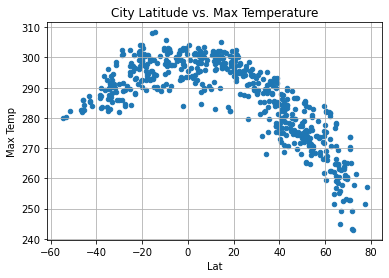

In [94]:
city_df.plot("Lat", "Max Temp", kind="scatter", title= "City Latitude vs. Max Temperature")
plt.grid()
plt.savefig('output_data/LatvsTemp.png')
plt.show()

In [ ]:
# From this plot, we can assume that latitude and max temperature have a negative correlation. As latitude increases,
# max temperature decreases

## Latitude vs. Humidity Plot

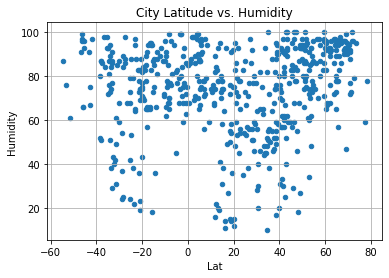

In [95]:
city_df.plot("Lat", "Humidity", kind="scatter", title= "City Latitude vs. Humidity")
plt.grid()
plt.savefig('output_data/LatvsHumidity.png')
plt.show()

In [ ]:
# This plot is messy and doesn't seem to have any real correlation.

## Latitude vs. Cloudiness Plot

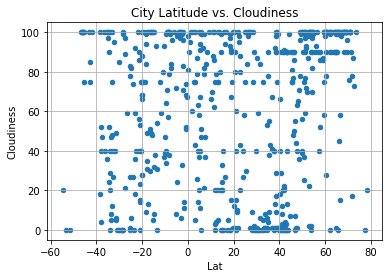

In [96]:
city_df.plot("Lat", "Cloudiness", kind="scatter", title= "City Latitude vs. Cloudiness")
plt.grid()
plt.savefig('output_data/LatvsCloudiness.png')
plt.show()

In [ ]:
# Like the last plot, it is hard to decipher anything from this plot.

## Latitude vs. Wind Speed Plot

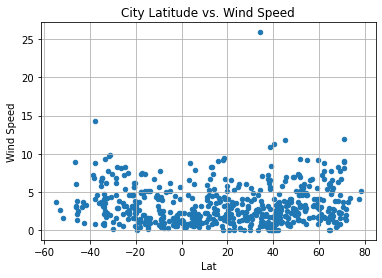

In [97]:
city_df.plot("Lat", "Wind Speed", kind="scatter", title= "City Latitude vs. Wind Speed")
plt.grid()
plt.savefig('output_data/LatvsWindSpeed.png')
plt.show()

In [ ]:
# It seems that the wind speed is uniform and lies between 0-10

## Linear Regression

In [102]:
#Creating dataframes for northern and souther hemispheres
north_df = city_df.loc[city_df["Lat"] >= 0]
south_df = city_df.loc[city_df["Lat"] < 0]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,293.75,38,8,3.59,AU,1636774888
2,Kaitangata,-46.2817,169.8464,282.56,97,100,5.98,NZ,1636774889
3,Esperance,-33.8667,121.9000,291.06,51,100,4.73,AU,1636774889
5,Hermanus,-34.4187,19.2345,289.76,87,24,3.14,ZA,1636774890
11,Lebu,-37.6167,-73.6500,283.72,86,47,4.04,CL,1636774892


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7819749698940481


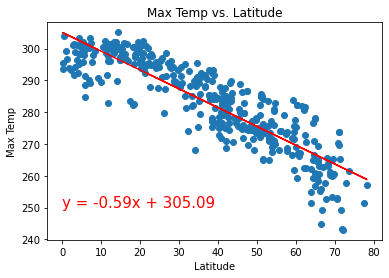

In [114]:
x_values = north_df["Lat"]
y_values = north_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,250),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Max Temp vs. Latitude")
print(f"The r-value is: {rvalue**2}")
plt.show()

In [ ]:
# Lie our first plot, there is a negative correlation between latitutde and max temp, with max temp decreasing as latitude decreases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4641640612132439


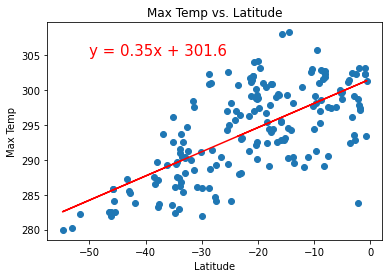

In [115]:
x_values = south_df["Lat"]
y_values = south_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,305),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Max Temp vs. Latitude")
print(f"The r-value is: {rvalue**2}")
plt.show()

In [ ]:
# It seems that in the southern hemisphere, as the latitude increases, the max temp also increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06544360609652075


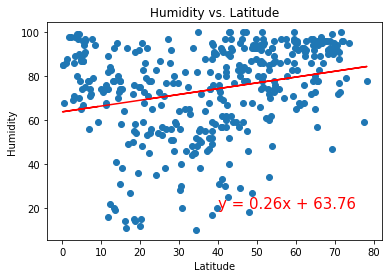

In [116]:
x_values = north_df["Lat"]
y_values = north_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude")
print(f"The r-value is: {rvalue**2}")
plt.show()

In [ ]:
# There seems to be a week positive correlation between latitude and humidity in the northern hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0011485993634379535


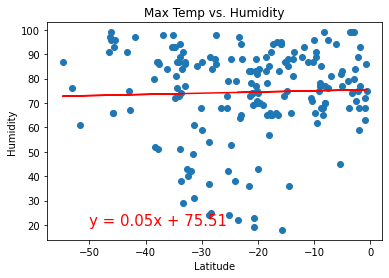

In [117]:
x_values = south_df["Lat"]
y_values = south_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Max Temp vs. Humidity")
print(f"The r-value is: {rvalue**2}")
plt.show()

In [ ]:
# Humidity and latitude seem to have little to no correlation in the southern hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.050852393182169574


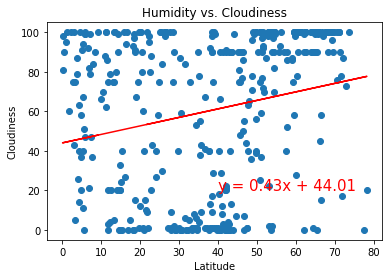

In [118]:
x_values = north_df["Lat"]
y_values = north_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Humidity vs. Cloudiness")
print(f"The r-value is: {rvalue**2}")
plt.show()

In [ ]:
# According to the linear regression, there seems to be a weak correlation between latitude and cloudiness in the northern hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.018052068997890126


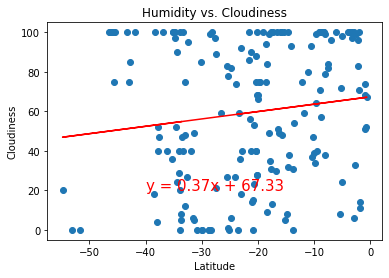

In [120]:
x_values = south_df["Lat"]
y_values = south_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Humidity vs. Cloudiness")
print(f"The r-value is: {rvalue**2}")
plt.show()

In [ ]:
# Just like the figure above, the linear regression seems to have a weak positive correlation

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.026339040166066155


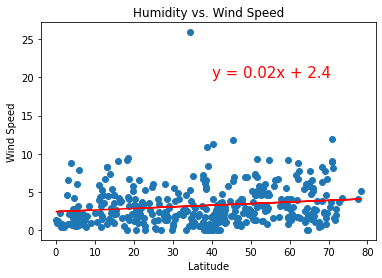

In [121]:
x_values = north_df["Lat"]
y_values = north_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Humidity vs. Wind Speed")
print(f"The r-value is: {rvalue**2}")
plt.show()

In [ ]:
# There seems to be no correlation between wind speed and latitude in the northern hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.07944584202627006


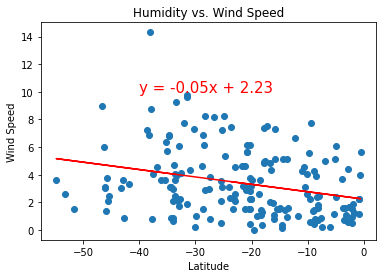

In [123]:
x_values = south_df["Lat"]
y_values = south_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Humidity vs. Wind Speed")
print(f"The r-value is: {rvalue**2}")
plt.show()

In [ ]:
# Just like the linear regression plot above, there seems to be no correlation between wind speed and latitude